<a href="https://colab.research.google.com/github/Richardo-Sitepu/Python_ModSim/blob/main/assignment14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
#PARAMETER
tTower= 80    #metre
tUser = 1.5
DistanceMin = 300
DistanceMax = 1001
JUser = 200
Dtrans = 30
GAtransmit = 10 #dB
GAreceive = 2 #dB
bandwidth = 5 #MHz
bandwidthSys = bandwidth * 1000000 #Hz
freqFF = 1800 #Mhz

#ODD FUNCTION FREQUENCY
freq1= 700 #Mhz
freq2= 900 #MHz
freq3 = 1800 #MHz

d = list(range(DistanceMin, DistanceMax))
print(d)

[300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499,

In [47]:
#paraneter modifier

fc1 = freqFF #for odd function

#fungsi

def calc_cm(freq): #to calculate cms pathloss
  cm1 = 0 #urban
  cm2 = (-2)*(np.log10(freq/28)*(np.log10(freq/28)-5.4)) #suburban
  cm3 = ((-4.58)*np.log10(freq)*np.log10(freq)+18.33*np.log10(freq)-40.94) #open
  return cm1,cm2,cm3

def nentuC(freq): #calculate c1 c2 pathloss
  if 400<=freq<=1500:
    c1 = 69.55
    c2 = 26.16
  if 1500<freq<=2000:
    c1=69.55
    c2=26.16
  return c1,c2

def calc_ahr(fc):
  ahr=((1.1*(np.log10(fc))-0.7)*tUser-(1.56*(np.log10(fc))-0.8))
  return ahr

def converterPD(power):
  dbm=10*np.log10(power)+30
  return dbm
def converterDP(dBm):
  Watt=(10**(dBm/10)) 
  return Watt

#odd function
cm1=calc_cm(fc1)
CC1= nentuC(fc1)
ahr1=calc_ahr(fc1)

#even function
cm21=calc_cm(freq1)
cm22=calc_cm(freq2)
cm23=calc_cm(freq3)

CC21=nentuC(freq1)
CC22=nentuC(freq2)
CC23=nentuC(freq3)

ahr21=calc_ahr(freq1)
ahr22=calc_ahr(freq2)
ahr23=calc_ahr(freq3)

def calc_lp(fc,ahr,c1,c2,cm,d,ht): #d=Distance,ht=height transmitter
  lp = c1 +c2*np.log10(fc)-13.83*np.log(ht)-ahr+(44.9-6.55*np.log10(ht))*np.log10(d)+cm
  return lp

lp11=calc_lp(fc1,ahr1,CC1[0],CC1[1],cm1[0],d,tTower)
lp12=calc_lp(fc1,ahr1,CC1[0],CC1[1],cm1[1],d,tTower)
lp13=calc_lp(fc1,ahr1,CC1[0],CC1[1],cm1[2],d,tTower)

lp21=calc_lp(freq1,ahr21,CC21[0],CC21[1],cm21[0],d,tTower)
lp22=calc_lp(freq2,ahr22,CC22[0],CC22[1],cm22[0],d,tTower)
lp23=calc_lp(freq3,ahr23,CC23[0],CC23[1],cm23[0],d,tTower)

dbmm = converterPD(50)
print(dbmm)
power=converterDP(dbmm)
print(power)


46.98970004336019
49999.99999999999


In [48]:
#fungsi2 baru
dbm=converterPD(Dtrans)

#fungsi
def tDaya(Ptx,PL,Gtx,Grx):
  daya = Ptx-PL+Gtx+Grx
  Prx=converterDP(daya)
  return Prx

def snr(Prx,BW):
  noise=-174+np.log10(BW)
  cvnoise = converterDP(noise)
  SNR=Prx/cvnoise
  return SNR

def cap(SNR,BW):
  capacity=BW*np.log2(1+SNR)
  return capacity

#1st, fungsi ganjil,ubah lokasi, cari daya terima
Prx11 = tDaya(dbm,lp11,GAtransmit,GAreceive)
Prx12 = tDaya(dbm,lp12,GAtransmit,GAreceive)
Prx13 = tDaya(dbm,lp13,GAtransmit,GAreceive)
#2nd, fungsi genap,ubah frequensi, cari daya terima
Prx21 = tDaya(dbm,lp21,GAtransmit,GAreceive)
Prx22 = tDaya(dbm,lp22,GAtransmit,GAreceive)
Prx23 = tDaya(dbm,lp23,GAtransmit,GAreceive)
#3rd plot
SNR11=snr(Prx11,bandwidthSys)
SNR12=snr(Prx12,bandwidthSys)
SNR13=snr(Prx13,bandwidthSys)
#4th plot
SNR21=snr(Prx21,bandwidthSys)
SNR22=snr(Prx22,bandwidthSys)
SNR23=snr(Prx23,bandwidthSys)
#5th plot
cap11=cap(SNR11,bandwidthSys)
cap12=cap(SNR12,bandwidthSys)
cap13=cap(SNR13,bandwidthSys)
#6th plot
cap21=cap(SNR21,bandwidthSys)
cap22=cap(SNR22,bandwidthSys)
cap23=cap(SNR23,bandwidthSys)


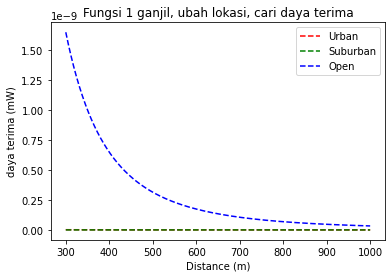

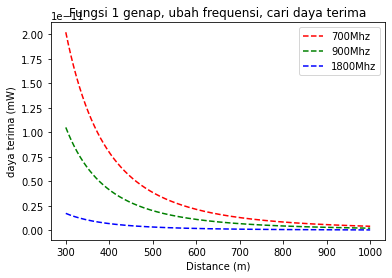

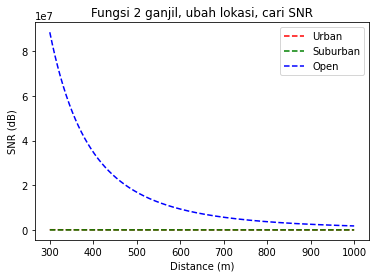

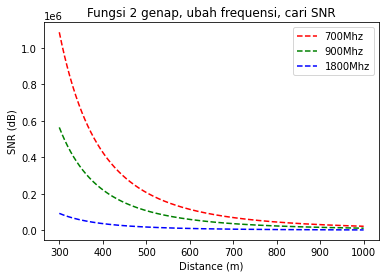

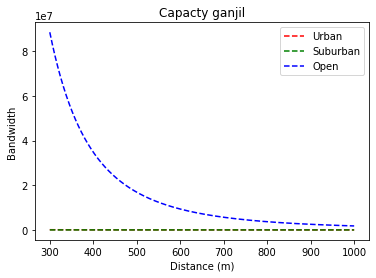

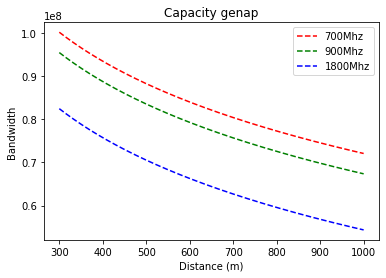

In [43]:
#1
plt.figure()
plt.plot(d,Prx11,'r--',label='Urban')
plt.plot(d,Prx12,'g--',label='Suburban')
plt.plot(d,Prx13,'b--',label='Open')
plt.legend()
plt.title('Fungsi 1 ganjil, ubah lokasi, cari daya terima')
plt.xlabel('Distance (m)')
plt.ylabel('Received Energy (mW)')
plt.show()

#2
plt.figure()
plt.plot(d,Prx21,'r--',label='700Mhz')
plt.plot(d,Prx22,'g--',label='900Mhz')
plt.plot(d,Prx23,'b--',label='1800Mhz')
plt.legend()
plt.title('Fungsi 1 genap, ubah frequensi, cari daya terima')
plt.xlabel('Distance (m)')
plt.ylabel('Received Energy (mW)')
plt.show()

#3
plt.figure()
plt.plot(d,SNR11,'r--',label='Urban')
plt.plot(d,SNR12,'g--',label='Suburban')
plt.plot(d,SNR13,'b--',label='Open')
plt.legend()
plt.title('Fungsi 2 ganjil, ubah lokasi, cari SNR')
plt.xlabel('Distance (m)')
plt.ylabel('SNR (dB)')
plt.show()

#4
plt.figure()
plt.plot(d,SNR21,'r--',label='700Mhz')
plt.plot(d,SNR22,'g--',label='900Mhz')
plt.plot(d,SNR23,'b--',label='1800Mhz')
plt.legend()
plt.title('Fungsi 2 genap, ubah frequensi, cari SNR')
plt.xlabel('Distance (m)')
plt.ylabel('SNR (dB)')
plt.show()

#5
plt.figure()
plt.plot(d,SNR11,'r--',label='Urban')
plt.plot(d,SNR12,'g--',label='Suburban')
plt.plot(d,SNR13,'b--',label='Open')
plt.legend()
plt.title('Odd Capacty')
plt.xlabel('Distance (m)')
plt.ylabel('Bandwidth')
plt.show()


#6
plt.figure()
plt.plot(d,kap21,'r--',label='700Mhz')
plt.plot(d,kap22,'g--',label='900Mhz')
plt.plot(d,kap23,'b--',label='1800Mhz')
plt.legend()
plt.title('Even Capacity')
plt.xlabel('Distance (m)')
plt.ylabel('Bandwidth')
plt.show()